In [1]:
import numpy as np
from PIL import Image
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt

from mdctn import mdct, imdct

%matplotlib inline
pylab.rcParams['figure.figsize'] = (8, 8)

In [2]:
y, cb, cr = Image.open('images/earth-64.png').convert('YCbCr').split()

In [3]:
im = np.array(y, dtype=np.int64)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

Text(0.5, 1.0, 'Original image in graymap')

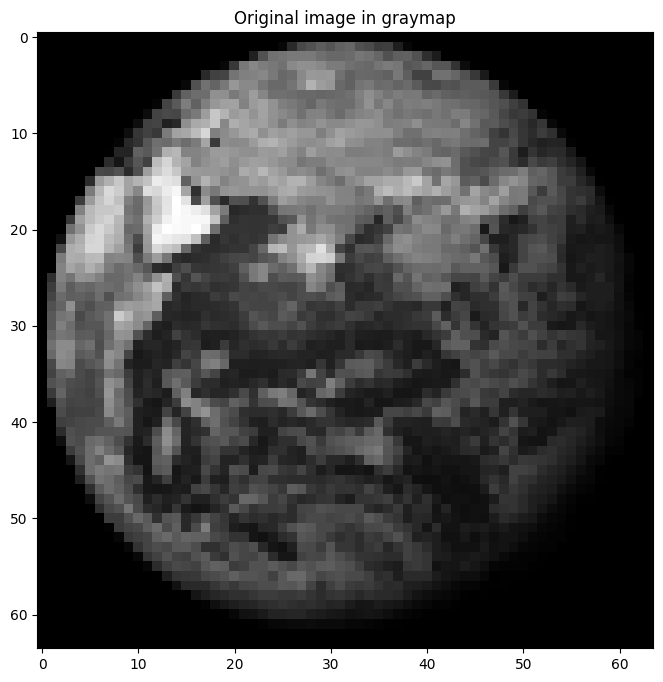

In [4]:
plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original image in graymap")

In [5]:
dct = np.zeros(im.shape)

for i in range(im.shape[0]):
    dct[i] = mdct(im[i], N=16, type=2, norm='ortho')

for i in range(dct.shape[1]):
    dct[:, i] = mdct(dct[:, i], N=16, type=2, norm='ortho')

Text(0.5, 1.0, 'Image mDCT in graymap')

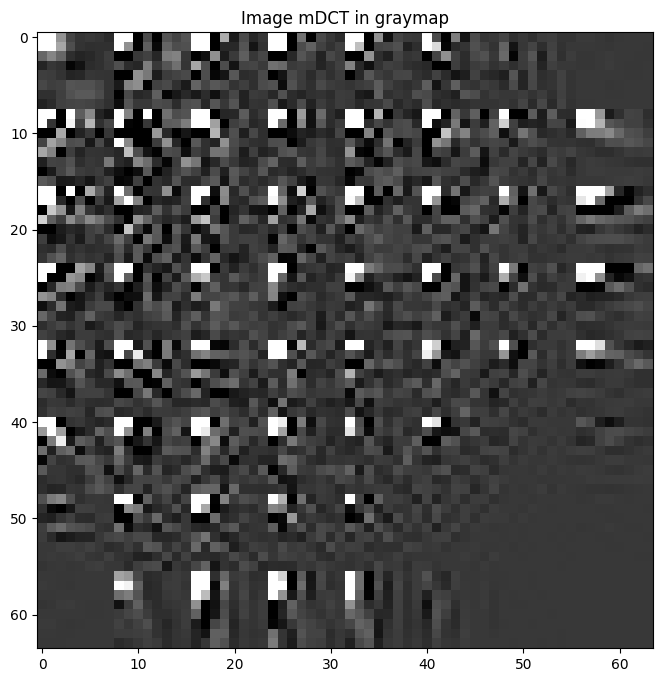

In [6]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.1, vmin=np.min(dct)*0.1)
plt.title("Image mDCT in graymap")

In [7]:
dct_mask = np.zeros((8, 8))

dct_mask = np.array([
    [1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
])

# dct_mask = np.array([
#     [1, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
# ])

# dct_mask = np.array([
#     [1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 0],
#     [1, 1, 1, 1, 1, 1, 0, 0],
#     [1, 1, 1, 1, 1, 0, 0, 0],
#     [1, 1, 1, 1, 0, 0, 0, 0],
# ])

# dct_mask = np.ones((8, 8))

for i in np.r_[:dct.shape[0]:8]:
    for j in np.r_[:dct.shape[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct[i:(i+8), j:(j+8)] * dct_mask

Text(0.5, 1.0, 'Modified imageDCTs in graymap')

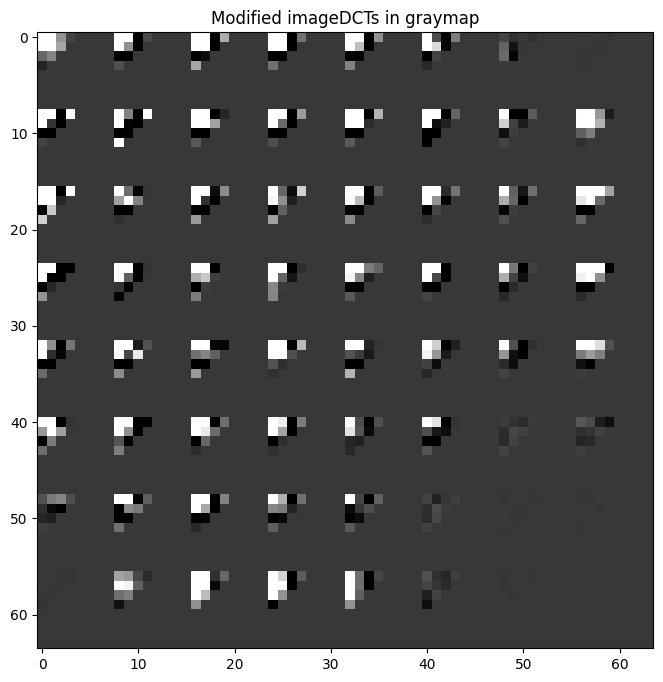

In [8]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.1, vmin=np.min(dct)*0.1)
plt.title("Modified imageDCTs in graymap")

In [9]:
rec = np.zeros(im.shape)

for i in range(dct.shape[1]):
    rec[:, i] = imdct(dct[:, i], N=16, type=2, norm='ortho')

for i in range(im.shape[0]):
    rec[i] = imdct(rec[i], N=16, type=2, norm='ortho')

Text(0.5, 1.0, 'Reconstructed image in graymap')

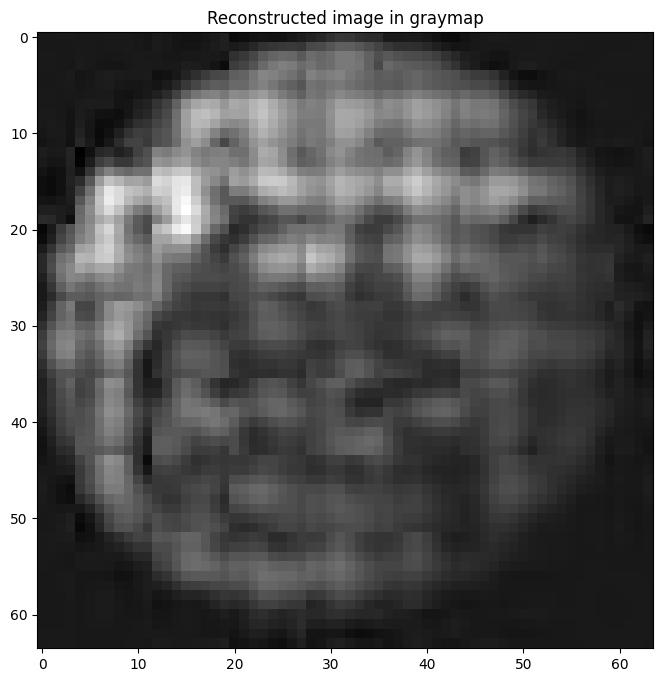

In [10]:
plt.figure()
plt.imshow(rec, cmap='gray')
plt.title("Reconstructed image in graymap")

In [11]:
np.allclose(im, rec)

False

Text(0.5, 1.0, 'Original image vs reconstructed. No windowing.')

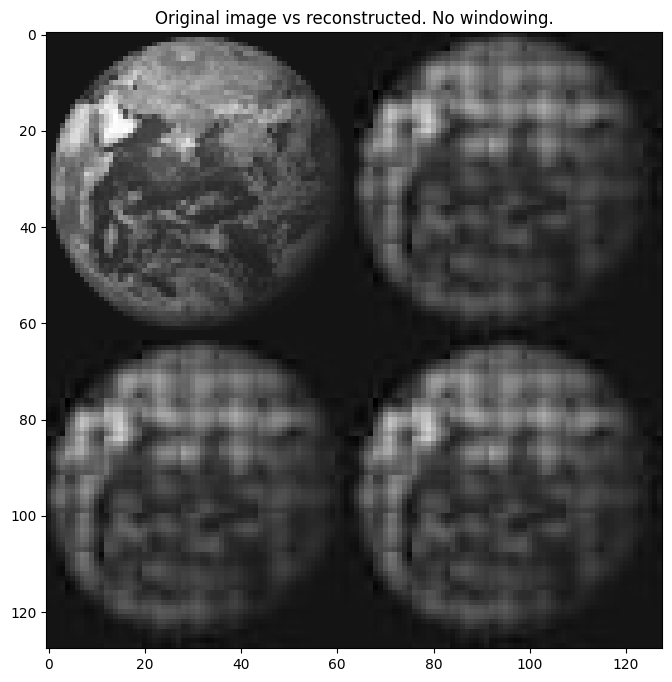

In [12]:
fig = plt.figure()
plt.imshow(np.vstack([np.hstack([im, rec]), np.hstack([rec, rec])]), cmap='gray')
plt.imsave(f'window.png', np.hstack([im, rec]), cmap='gray')
plt.title("Original image vs reconstructed. No windowing.")

In [13]:
np.abs(im - rec).max()

74.07565721326407

Text(0.5, 1.0, 'Relative error in reconstructed image')

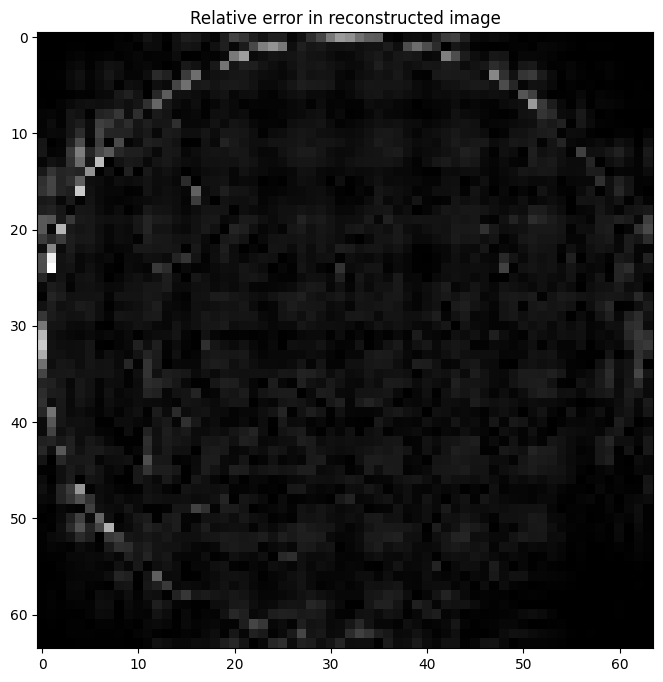

In [22]:
diff=np.abs(im - rec)



zim = im.copy()

zim[zim < 5] = 5

diff = diff / zim



# diff[diff < diff.mean() * 100] = 0

plt.figure()
plt.imshow(diff, cmap='gray')
plt.title("Relative error in reconstructed image")

In [15]:
s = diff.sum(axis=0)

In [16]:
s

array([ 6.51444193, 11.18176726, 11.77677001, 12.73518714, 14.22804045,
       14.29102299, 10.87553942,  9.09944489,  9.84319269, 11.64402925,
       13.60634722, 25.44955177, 21.17784572, 20.39542172, 17.83365614,
       13.68227061, 18.38206398, 19.07176307, 17.5419896 , 22.25703565,
       19.7561896 , 22.30730197, 16.07669054, 12.31507667, 13.41425753,
       17.16422008, 18.6605614 , 25.12457134, 22.44888331, 21.10054715,
       15.80055044, 15.39429109, 12.94626303, 16.02154982, 20.46635918,
       23.02357615, 21.65185929, 21.75136213, 14.32740807, 11.40687892,
       12.44809994, 14.50113726, 17.33865233, 20.88455523, 19.01658912,
       18.29073958, 13.79755157, 10.35267608, 13.48409532, 12.84452628,
       13.71973634, 18.63817004, 16.01870725, 14.68182134, 10.55001825,
        7.74039759,  6.4325698 ,  6.35291304,  9.02229529,  8.8078862 ,
        5.23107147,  2.34507108,  2.70291617,  2.72346383])